# **SKIN CANCER IMAGE CLASSIFICATION**

In [1]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg


import warnings
warnings.filterwarnings('ignore')

In [2]:
!ls ../data

Additional_malignant
ISIC_2019_512x512
ISIC_2019_512x512.csv
ISIC_2019_Training_GroundTruth.csv
ISIC_2019_Training_Input
ISIC_2019_Training_Metadata.csv
ISIC_2020_Training_GroundTruth.csv
ISIC_2020_Training_JPEG
ISIC_FINAL_DATASET.csv
add_train_malig_2.csv


**DATASET-1:**

https://challenge2020.isic-archive.com/


The dataset contains 33,126 dermoscopic training images of unique benign and malignant skin lesions from over 2,000 patients. Each image is associated with one of these individuals using a unique patient identifier. All malignant diagnoses have been confirmed via histopathology, and benign diagnoses have been confirmed using either expert agreement, longitudinal follow-up, or histopathology. A thorough publication describing all features of this dataset is available in the form of a pre-print that has not yet undergone peer review.

The dataset was generated by the International Skin Imaging Collaboration (ISIC) and images are from the following sources: Hospital Clínic de Barcelona, Medical University of Vienna, Memorial Sloan Kettering Cancer Center, Melanoma Institute Australia, University of Queensland, and the University of Athens Medical School.

The dataset was curated for the SIIM-ISIC Melanoma Classification Challenge hosted on Kaggle during the Summer of 2020.

DOI: https://doi.org/10.34970/2020-ds01




**DATASET-2:**

https://challenge2019.isic-archive.com/

Background

Skin cancer is the most common cancer globally, with melanoma being the most deadly form. Dermoscopy is a skin imaging modality that has demonstrated improvement for diagnosis of skin cancer compared to unaided visual inspection. However, clinicians should receive adequate training for those improvements to be realized. In order to make expertise more widely available, the International Skin Imaging Collaboration (ISIC) has developed the ISIC Archive, an international repository of dermoscopic images, for both the purposes of clinical training, and for supporting technical research toward automated algorithmic analysis by hosting the ISIC Challenges.

#Task
The goal for ISIC 2019 is classify dermoscopic images among nine different diagnostic categories:

- Melanoma
- Melanocytic nevus
- Basal cell carcinoma
- Actinic keratosis
- Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)
- Dermatofibroma
- Vascular lesion
- Squamous cell carcinoma
- None of the others


25,331 images are available for training across 8 different categories. 

**ADDITIONAL DATASET FROM ISIC ARCHIVE**


https://www.kaggle.com/c/siim-isic-melanoma-classification/discussion/169139

JPEG folder of the 580 new never seen before malignant images

In [3]:
# define datasets
df2020 = pd.read_csv('../data/ISIC_2020_Training_GroundTruth.csv')
df2019a = pd.read_csv('../data/ISIC_2019_Training_Metadata.csv')
df2019b = pd.read_csv('../data/ISIC_2019_Training_GroundTruth.csv')

In [4]:
!ls ../data

Additional_malignant
ISIC_2019_512x512
ISIC_2019_512x512.csv
ISIC_2019_Training_GroundTruth.csv
ISIC_2019_Training_Input
ISIC_2019_Training_Metadata.csv
ISIC_2020_Training_GroundTruth.csv
ISIC_2020_Training_JPEG
ISIC_FINAL_DATASET.csv
add_train_malig_2.csv


In [5]:
# define the file path
data2019_directory = '../data/ISIC_2019_Training_Input/'
data2020_directory = '../data/ISIC_2020_Training_JPEG/'

## Data Exploration

### ISIC - 2020 DATASET

In [6]:
df2020

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [7]:
df2020['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [8]:
df2020['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [9]:
# add image's path data to train and test set
df2020['path'] = data2020_directory + df2020['image_name'] + ".jpg"

In [10]:
df2020

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,path
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg
...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999134.jpg
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999320.jpg
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999515.jpg
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999666.jpg


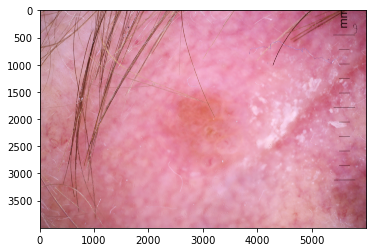

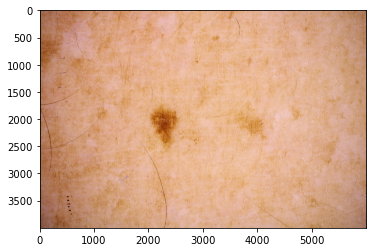

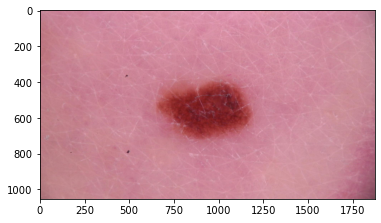

In [11]:
# look into 3 image samples:
for im in df2020['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

### ISIC - 2019 DATASET

In [12]:
df2019a

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [13]:
df2019b

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- MEL: Melonoma   --->  Malignant
- NV: Melanocytic nevus ---> Benign
- BCC: Basal cell carcinoma ---> Malignant
- AK: Actinic keratosis ---> Benign
- BKL: Benign keratosis ---> Benign
- DF: Dermatofibroma ---> Benign
- VASC: Vascular Lesion  ---> Can be Benign or Malignant  ---> Unknown
- SCC: Squamous cell carcinoma ---> Malignant
- UNK: Unknown

In [14]:
df2019 = pd.merge(df2019a, df2019b, on='image')
df2019.rename(columns = {'image':'image_name'}, inplace = True)
df2019.rename(columns = {'anatom_site_general':'anatom_site_general_challenge'}, inplace = True)
df2019

,image_name,age_approx,anatom_site_general_challenge,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,55.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,30.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,60.0,upper extremity,NaN,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,30.0,upper extremity,NaN,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,80.0,posterior torso,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df2019['benign_malignant'] = 0*len(df2019['image_name'])
for i in df2019.index:
    if df2019['MEL'][i] ==1:
        df2019['benign_malignant'][i] = 'malignant'
    if df2019['NV'][i] ==1:
        df2019['benign_malignant'][i] = 'benign'
    if df2019['BCC'][i] ==1:
        df2019['benign_malignant'][i] = 'malignant'
    if df2019['AK'][i] ==1:
        df2019['benign_malignant'][i] = 'benign'
    if df2019['BKL'][i] ==1:
        df2019['benign_malignant'][i] = 'benign'
    if df2019['DF'][i] ==1:
        df2019['benign_malignant'][i] = 'benign'
    if df2019['VASC'][i] ==1:
        df2019['benign_malignant'][i] = 'unknown'
    if df2019['SCC'][i] ==1:
        df2019['benign_malignant'][i] = 'malignant'
    if df2019['UNK'][i] ==1:
        df2019['benign_malignant'][i] = 'unknown'        

In [16]:
df2019.drop(columns=['MEL','NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], axis=1, inplace=True)
df2019

,image_name,age_approx,anatom_site_general_challenge,lesion_id,sex,benign_malignant
0,ISIC_0000000,55.0,anterior torso,NaN,female,benign
1,ISIC_0000001,30.0,anterior torso,NaN,female,benign
2,ISIC_0000002,60.0,upper extremity,NaN,female,malignant
3,ISIC_0000003,30.0,upper extremity,NaN,male,benign
4,ISIC_0000004,80.0,posterior torso,NaN,male,malignant
...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,malignant
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,benign
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,malignant
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,benign


In [17]:
df2019['benign_malignant'].value_counts()

benign       16605
malignant     8473
unknown        253
Name: benign_malignant, dtype: int64

In [18]:
df2019 = df2019[df2019['benign_malignant']!='unknown']
df2019

,image_name,age_approx,anatom_site_general_challenge,lesion_id,sex,benign_malignant
0,ISIC_0000000,55.0,anterior torso,NaN,female,benign
1,ISIC_0000001,30.0,anterior torso,NaN,female,benign
2,ISIC_0000002,60.0,upper extremity,NaN,female,malignant
3,ISIC_0000003,30.0,upper extremity,NaN,male,benign
4,ISIC_0000004,80.0,posterior torso,NaN,male,malignant
...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,malignant
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,benign
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,malignant
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,benign


In [19]:
df2019['benign_malignant'].value_counts()

benign       16605
malignant     8473
Name: benign_malignant, dtype: int64

In [20]:
df2019['target'] = 0*len(df2019['image_name'])
for i in df2019.index:
    if df2019['benign_malignant'][i] == 'malignant':
        df2019['target'][i] = 1
    else:
        df2019['target'][i] = 0

In [21]:
df2019

,image_name,age_approx,anatom_site_general_challenge,lesion_id,sex,benign_malignant,target
0,ISIC_0000000,55.0,anterior torso,NaN,female,benign,0
1,ISIC_0000001,30.0,anterior torso,NaN,female,benign,0
2,ISIC_0000002,60.0,upper extremity,NaN,female,malignant,1
3,ISIC_0000003,30.0,upper extremity,NaN,male,benign,0
4,ISIC_0000004,80.0,posterior torso,NaN,male,malignant,1
...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,malignant,1
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,benign,0
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,malignant,1
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,benign,0


In [22]:
# add image's path data 
df2019['path'] = data2019_directory + df2019['image_name'] + ".jpg"

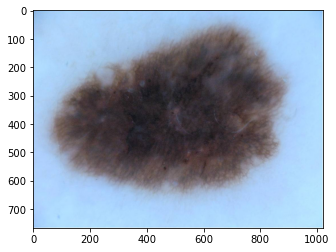

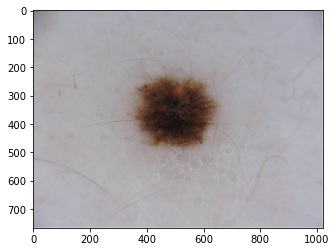

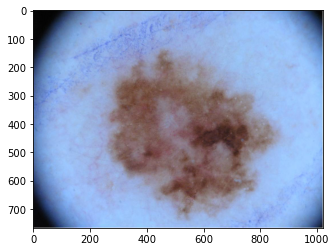

In [23]:
# look into top 5 data and see the images:
for im in df2019['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

## ISIC ARCHIVE DATASET

In [24]:
# dataset is from :https://www.kaggle.com/cdeotte/malignant-v2-1024x1024?select=jpeg1024
# Additional malignant dataset with directory path:
pathAdd = '../data/Additional_malignant/'
dfAdd = pd.read_csv('../data/add_train_malig_2.csv')
dfAdd

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,width,height,source,ext,tfrecord
0,ISIC_0000070,-1,male,25.0,anterior torso,melanoma,malignant,1,1022,767,UDA-1,jpg,15
1,ISIC_0000076,-1,male,55.0,posterior torso,melanoma,malignant,1,1504,1129,UDA-1,jpg,15
2,ISIC_0000144,-1,NaN,NaN,NaN,melanoma,malignant,1,2048,1536,UDA-1,jpg,15
3,ISIC_0000158,-1,female,30.0,upper extremity,melanoma,malignant,1,722,542,UDA-1,jpg,15
4,ISIC_0000284,-1,male,80.0,head/neck,melanoma,malignant,1,1024,768,UDA-1,jpg,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,ISIC_0024302,-1,female,25.0,NaN,melanoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29
576,ISIC_0024303,-1,male,60.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29
577,ISIC_0024304,-1,male,70.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29
578,ISIC_0024305,-1,male,85.0,NaN,squamous cell carcinoma,malignant,1,4288,2848,2018 JID Editorial Images,jpg,29


In [25]:
# add image's path directory to the data 
dfAdd['path'] = pathAdd + dfAdd['image_name'] + ".jpg"
dfAdd

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,width,height,source,ext,tfrecord,path
0,ISIC_0000070,-1,male,25.0,anterior torso,melanoma,malignant,1,1022,767,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000070.jpg
1,ISIC_0000076,-1,male,55.0,posterior torso,melanoma,malignant,1,1504,1129,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000076.jpg
2,ISIC_0000144,-1,NaN,NaN,NaN,melanoma,malignant,1,2048,1536,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000144.jpg
3,ISIC_0000158,-1,female,30.0,upper extremity,melanoma,malignant,1,722,542,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000158.jpg
4,ISIC_0000284,-1,male,80.0,head/neck,melanoma,malignant,1,1024,768,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000284.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,ISIC_0024302,-1,female,25.0,NaN,melanoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024302.jpg
576,ISIC_0024303,-1,male,60.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024303.jpg
577,ISIC_0024304,-1,male,70.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024304.jpg
578,ISIC_0024305,-1,male,85.0,NaN,squamous cell carcinoma,malignant,1,4288,2848,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024305.jpg


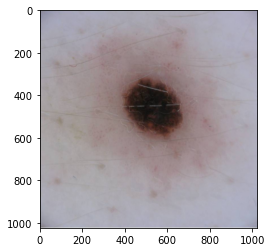

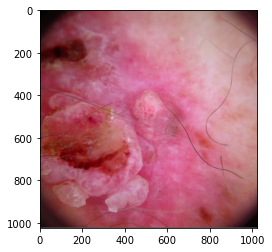

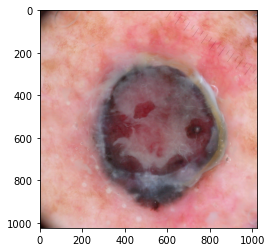

In [26]:
# look into 3 image samples:
for im in dfAdd['path'][:3]:
    img = mpimg.imread(im)
    imgplot = plt.imshow(img)
    plt.show()

## Final Dataset:

In [27]:
# Data from ISIC 2020
df2020

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,path
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg
...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999134.jpg
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999320.jpg
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999515.jpg
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_9999666.jpg


In [28]:
# Data from ISIC 2019
df2019

,image_name,age_approx,anatom_site_general_challenge,lesion_id,sex,benign_malignant,target,path
0,ISIC_0000000,55.0,anterior torso,NaN,female,benign,0,../data/ISIC_2019_Training_Input/ISIC_0000000.jpg
1,ISIC_0000001,30.0,anterior torso,NaN,female,benign,0,../data/ISIC_2019_Training_Input/ISIC_0000001.jpg
2,ISIC_0000002,60.0,upper extremity,NaN,female,malignant,1,../data/ISIC_2019_Training_Input/ISIC_0000002.jpg
3,ISIC_0000003,30.0,upper extremity,NaN,male,benign,0,../data/ISIC_2019_Training_Input/ISIC_0000003.jpg
4,ISIC_0000004,80.0,posterior torso,NaN,male,malignant,1,../data/ISIC_2019_Training_Input/ISIC_0000004.jpg
...,...,...,...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,malignant,1,../data/ISIC_2019_Training_Input/ISIC_0073247.jpg
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,benign,0,../data/ISIC_2019_Training_Input/ISIC_0073248.jpg
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,malignant,1,../data/ISIC_2019_Training_Input/ISIC_0073249.jpg
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,benign,0,../data/ISIC_2019_Training_Input/ISIC_0073251.jpg


In [29]:
# Additional Data from ISIC Archive
dfAdd

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,width,height,source,ext,tfrecord,path
0,ISIC_0000070,-1,male,25.0,anterior torso,melanoma,malignant,1,1022,767,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000070.jpg
1,ISIC_0000076,-1,male,55.0,posterior torso,melanoma,malignant,1,1504,1129,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000076.jpg
2,ISIC_0000144,-1,NaN,NaN,NaN,melanoma,malignant,1,2048,1536,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000144.jpg
3,ISIC_0000158,-1,female,30.0,upper extremity,melanoma,malignant,1,722,542,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000158.jpg
4,ISIC_0000284,-1,male,80.0,head/neck,melanoma,malignant,1,1024,768,UDA-1,jpg,15,../data/Additional_malignant/ISIC_0000284.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,ISIC_0024302,-1,female,25.0,NaN,melanoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024302.jpg
576,ISIC_0024303,-1,male,60.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024303.jpg
577,ISIC_0024304,-1,male,70.0,NaN,squamous cell carcinoma,malignant,1,3008,2000,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024304.jpg
578,ISIC_0024305,-1,male,85.0,NaN,squamous cell carcinoma,malignant,1,4288,2848,2018 JID Editorial Images,jpg,29,../data/Additional_malignant/ISIC_0024305.jpg


In [30]:
df_final = pd.concat([df2020, df2019, dfAdd], axis=0, ignore_index= True)
df_final

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,path,lesion_id,width,height,source,ext,tfrecord
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg,NaN,NaN,NaN,NaN,NaN,NaN
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg,NaN,NaN,NaN,NaN,NaN,NaN
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg,NaN,NaN,NaN,NaN,NaN,NaN
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg,NaN,NaN,NaN,NaN,NaN,NaN
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58779,ISIC_0024302,-1,female,25.0,NaN,melanoma,malignant,1,../data/Additional_malignant/ISIC_0024302.jpg,NaN,3008.0,2000.0,2018 JID Editorial Images,jpg,29.0
58780,ISIC_0024303,-1,male,60.0,NaN,squamous cell carcinoma,malignant,1,../data/Additional_malignant/ISIC_0024303.jpg,NaN,3008.0,2000.0,2018 JID Editorial Images,jpg,29.0
58781,ISIC_0024304,-1,male,70.0,NaN,squamous cell carcinoma,malignant,1,../data/Additional_malignant/ISIC_0024304.jpg,NaN,3008.0,2000.0,2018 JID Editorial Images,jpg,29.0
58782,ISIC_0024305,-1,male,85.0,NaN,squamous cell carcinoma,malignant,1,../data/Additional_malignant/ISIC_0024305.jpg,NaN,4288.0,2848.0,2018 JID Editorial Images,jpg,29.0


In [31]:
df_final['target'].value_counts()

0    49147
1     9637
Name: target, dtype: int64

We still have class imbalance problem, but this is better than having 1% for minority class.

In [32]:
# Save the final dataset
df_final.to_csv('../data/ISIC_FINAL_DATASET.csv')

## Exploratory Data Analysis

In [33]:
# create a copy of df_final for EDA purposes:
df_copy = df_final[['image_name', 'path', 'sex', 'age_approx', 'anatom_site_general_challenge', 'benign_malignant']]
df_copy

,image_name,path,sex,age_approx,anatom_site_general_challenge,benign_malignant
0,ISIC_2637011,../data/ISIC_2020_Training_JPEG/ISIC_2637011.jpg,male,45.0,head/neck,benign
1,ISIC_0015719,../data/ISIC_2020_Training_JPEG/ISIC_0015719.jpg,female,45.0,upper extremity,benign
2,ISIC_0052212,../data/ISIC_2020_Training_JPEG/ISIC_0052212.jpg,female,50.0,lower extremity,benign
3,ISIC_0068279,../data/ISIC_2020_Training_JPEG/ISIC_0068279.jpg,female,45.0,head/neck,benign
4,ISIC_0074268,../data/ISIC_2020_Training_JPEG/ISIC_0074268.jpg,female,55.0,upper extremity,benign
...,...,...,...,...,...,...
58779,ISIC_0024302,../data/Additional_malignant/ISIC_0024302.jpg,female,25.0,NaN,malignant
58780,ISIC_0024303,../data/Additional_malignant/ISIC_0024303.jpg,male,60.0,NaN,malignant
58781,ISIC_0024304,../data/Additional_malignant/ISIC_0024304.jpg,male,70.0,NaN,malignant
58782,ISIC_0024305,../data/Additional_malignant/ISIC_0024305.jpg,male,85.0,NaN,malignant


In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58784 entries, 0 to 58783
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     58784 non-null  object 
 1   path                           58784 non-null  object 
 2   sex                            58302 non-null  object 
 3   age_approx                     58256 non-null  float64
 4   anatom_site_general_challenge  55548 non-null  object 
 5   benign_malignant               58784 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.7+ MB


In [35]:
df_copy.isna().sum()

image_name                          0
path                                0
sex                               482
age_approx                        528
anatom_site_general_challenge    3236
benign_malignant                    0
dtype: int64

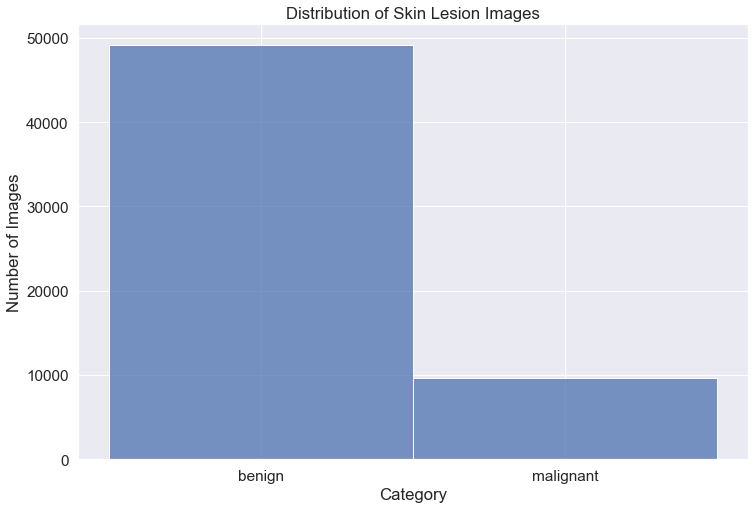

In [36]:
# Creating a histogram to visualize the class imbalance
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.histplot(data=df_copy, x="benign_malignant")
plt.ylabel("Number of Images")
plt.xlabel("Category")
plt.title('Distribution of Skin Lesion Images');

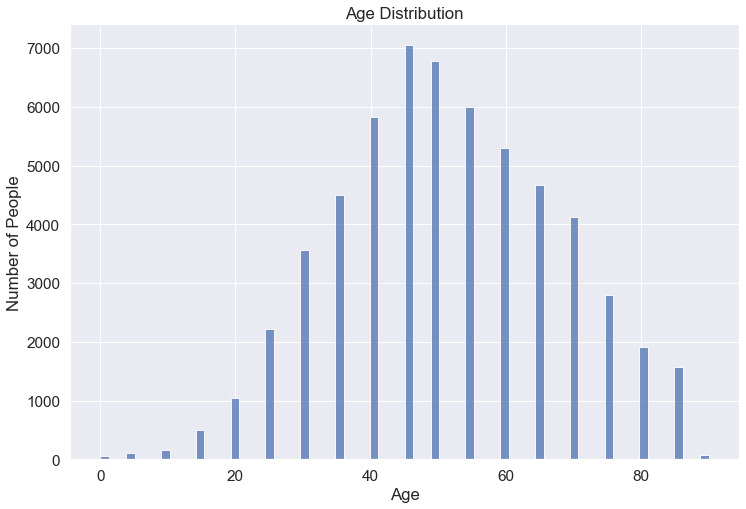

In [37]:
# Creating a histogram to visualize age distribution
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.histplot(data=df_copy, x="age_approx")
plt.ylabel("Number of People")
plt.xlabel("Age")
plt.title('Age Distribution');

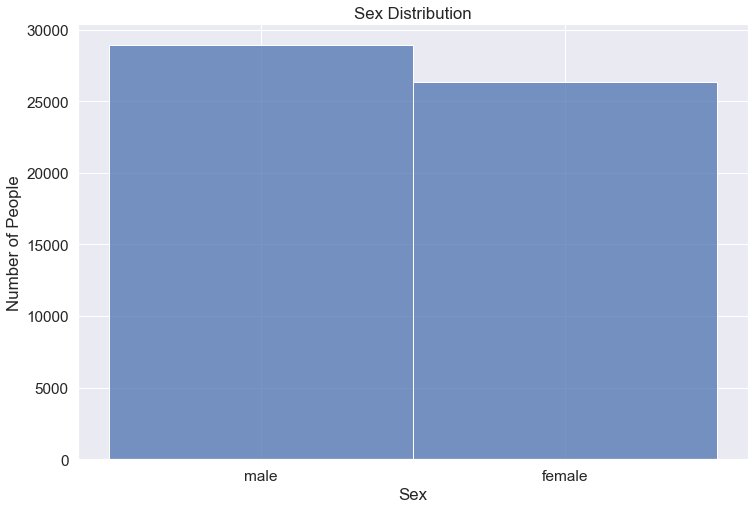

In [38]:
# Creating a histogram to visualize sex
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.histplot(data=df_copy.dropna(), x="sex")
plt.ylabel("Number of People")
plt.xlabel("Sex")
plt.title('Sex Distribution');

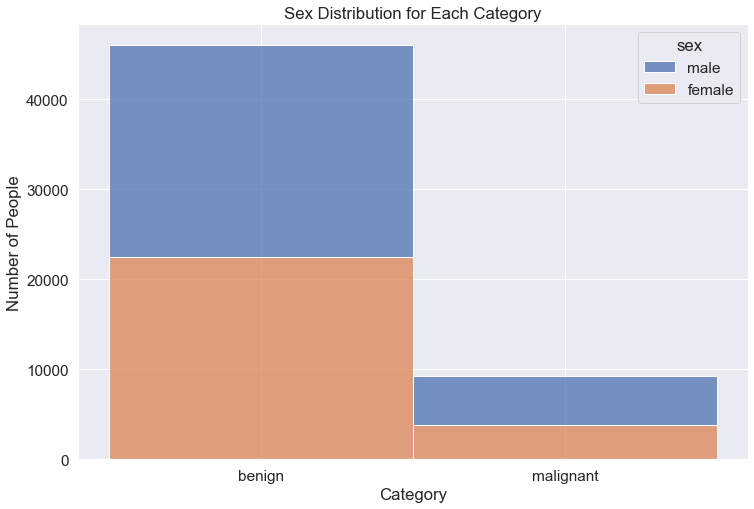

In [39]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.histplot(data=df_copy.dropna(), x="benign_malignant", hue="sex",  multiple="stack")
plt.ylabel("Number of People")
plt.xlabel("Category")
plt.title('Sex Distribution for Each Category');